In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
from PBSHM_mdof.data.data_handler import HDF5DataBuilder
from PBSHM_mdof.system.simulation import Simulation
from PBSHM_mdof.system.population import Population

import h5py
from config import settings


In [69]:
from pathlib import Path
path_raw= Path(settings.default['path']['abspath']) / Path(settings.default['path']['generated_dataset'])
population_path = Path(settings.default['path']['abspath'])/Path(settings.default['path']['population_params'])


In [90]:
with h5py.File(path_raw, 'r') as f:
    dh = HDF5DataBuilder(f)
    iter_ = dh.iter_data()
    for i in iter_:
        print(i['time_domain_data']["system_0"].shape)
        break

(4000, 24)


In [80]:
s

1562

In [55]:
healthy_population = Population()
healthy_population.load_population(population_path)
simulator = Simulation(healthy_population,dt=0.0025,t_end=10.0)

In [56]:
acc7=simulator.simulation_white_noise()['system_0']['output'][:,2*8+1]

In [57]:
import matplotlib.pyplot as plt
from scipy import signal
def compute_PSD(acc,dt):
    f, Pxx_den = signal.welch(acc, 1/dt, nperseg=1024, scaling='spectrum')
    return f,Pxx_den

In [58]:
f,Sxx= compute_PSD(acc7,0.0025)

(0.0, 125.0)

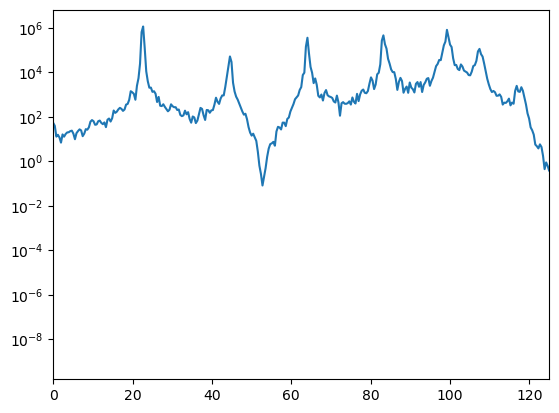

In [59]:
plt.plot(f,Sxx)
plt.yscale('log')
plt.xlim(0,125)

In [60]:
population_affected=Population_EOC_generator(healthy_population)
population_affected.generate_coefficients()

NameError: name 'Population_EOC_generator' is not defined

In [10]:
population_example = population_affected.affect_temperature(50)
population_example.compute_systems_matrices()

In [11]:
simulator = Simulation(population_example,dt=0.0025,t_end=10.0)

In [12]:
acc7=simulator.simulation_white_noise()['system_0']['output'][:,2*8+1]

In [13]:
f,Sxx1= compute_PSD(acc7,0.0025)

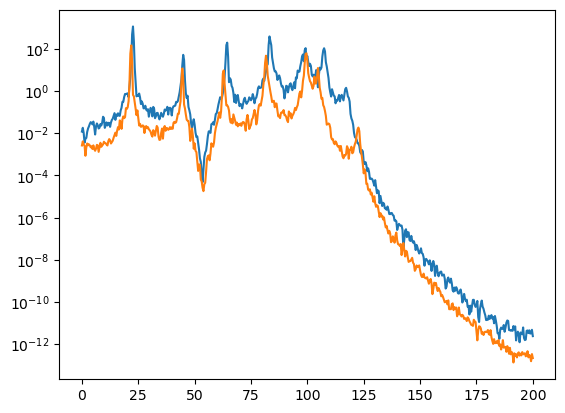

In [15]:
plt.plot(f,Sxx)
plt.plot(f,Sxx1)
plt.yscale('log')

In [16]:
population_examplepopulation_example.add_anomaly(anomaly_size=0.14)

In [17]:
simulator = Simulation(population_example,dt=0.0025,t_end=10.0)

In [154]:
acc7=simulator.simulation_white_noise()['system_0']['output'][:,2*8+1]

In [155]:
f,Sxx2= compute_PSD(acc7,0.0025)

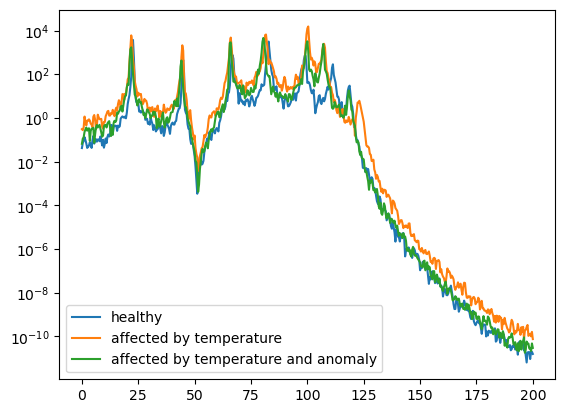

In [158]:
plt.plot(f,Sxx, label='healthy')
plt.plot(f,Sxx1, label='affected by temperature')
plt.plot(f,Sxx2, label='affected by temperature and anomaly')
plt.yscale('log')
plt.legend()